In [51]:
# Dependencies
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import csv

In [52]:
# Read application_data csv file
# Create application DataFrame

app_data = "application_data1.csv"
application = pd.read_csv(app_data)
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# Read previous_application csv file
# Create previous DataFrame

previous_app_data = "previous_application1.csv"
previous_app = pd.read_csv(previous_app_data)
previous_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# Create new application_data file for selected columns only

appdata = application[["SK_ID_CURR", 
                        "TARGET",
                        "NAME_CONTRACT_TYPE",
                        "CODE_GENDER",
                        "FLAG_OWN_CAR",
                        "FLAG_OWN_REALTY",
                        "CNT_CHILDREN",
                        "AMT_INCOME_TOTAL",
                        "AMT_CREDIT",
                        "AMT_ANNUITY",
                        "AMT_GOODS_PRICE",
                        "NAME_INCOME_TYPE",
                        "NAME_EDUCATION_TYPE",
                        "NAME_FAMILY_STATUS",
                        "NAME_HOUSING_TYPE",
                        "REGION_POPULATION_RELATIVE",
                        "DAYS_BIRTH",
                        "OCCUPATION_TYPE",
                        "CNT_FAM_MEMBERS",
                        "REGION_RATING_CLIENT",
                        "WEEKDAY_APPR_PROCESS_START",
                        "ORGANIZATION_TYPE",
                        "OBS_30_CNT_SOCIAL_CIRCLE",
                        "DEF_30_CNT_SOCIAL_CIRCLE",
                        "OBS_60_CNT_SOCIAL_CIRCLE",
                        "DEF_60_CNT_SOCIAL_CIRCLE",
                        "AMT_REQ_CREDIT_BUREAU_MON",
                        "AMT_REQ_CREDIT_BUREAU_QRT",
                        "AMT_REQ_CREDIT_BUREAU_YEAR"]]

In [55]:
# Rename applications data columns - before merge
# Add 'CURR' to the column heading to denote the original application_data file

clean_appdata = appdata.rename(columns={"TARGET": "CURR_TARGET",
                                        "NAME_CONTRACT_TYPE": "CURR_NAME_CONTRACT_TYPE",
                                        "CODE_GENDER": "CURR_CODE_GENDER",
                                        "FLAG_OWN_CAR": "CURR_FLAG_OWN_CAR",
                                        "FLAG_OWN_REALTY": "CURR_FLAG_OWN_REALTY",
                                        "CNT_CHILDREN": "CURR_CNT_CHILDREN",
                                        "AMT_INCOME_TOTAL": "CURR_AMT_INCOME_TOTAL",
                                        "AMT_CREDIT": "CURR_AMT_CREDIT",
                                        "AMT_ANNUITY": "CURR_AMT_ANNUITY",
                                        "AMT_GOODS_PRICE": "CURR_AMT_GOODS_PRICE",
                                        "NAME_INCOME_TYPE": "CURR_NAME_INCOME_TYPE",
                                        "NAME_EDUCATION_TYPE": "CURR_NAME_EDUCATION_TYPE",
                                        "NAME_FAMILY_STATUS": "CURR_NAME_FAMILY_STATUS",
                                        "NAME_HOUSING_TYPE": "CURR_NAME_HOUSING_TYPE",
                                        "REGION_POPULATION_RELATIVE": "CURR_REGION_POPULATION_RELATIVE",
                                        "DAYS_BIRTH": "CURR_DAYS_BIRTH",
                                        "OCCUPATION_TYPE": "CURR_OCCUPATION_TYPE",
                                        "CNT_FAM_MEMBERS": "CURR_CNT_FAM_MEMBERS",
                                        "REGION_RATING_CLIENT": "CURR_REGION_RATING_CLIENT",
                                        "WEEKDAY_APPR_PROCESS_START": "CURR_WEEKDAY_APPR_PROCESS_START",
                                        "ORGANIZATION_TYPE": "CURR_ORGANIZATION_TYPE",
                                        "OBS_30_CNT_SOCIAL_CIRCLE": "CURR_OBS_30_CNT_SOCIAL_CIRCLE",
                                        "DEF_30_CNT_SOCIAL_CIRCLE": "CURR_DEF_30_CNT_SOCIAL_CIRCLE",
                                        "OBS_60_CNT_SOCIAL_CIRCLE": "CURR_OBS_60_SOCIAL_CIRCLE",
                                        "DEF_60_CNT_SOCIAL_CIRCLE": "CURR_DEF_60_SOCIAL_CIRCLE",
                                        "AMT_REQ_CREDIT_BUREAU_MON": "CURR_AMT_REQ_CREDIT_BUREAU_MON",
                                        "AMT_REQ_CREDIT_BUREAU_QRT": "CURR_AMT_REQ_CREDIT_BUREAU_MON",
                                        "AMT_REQ_CREDIT_BUREAU_YEAR": "CURR_AMT_REQ_CREDIT_BUREAU_YEAR" 
                                       })

In [56]:
# Create previous_application_data file with with selected columns

prevdata = previous_app[["SK_ID_PREV",
                        "SK_ID_CURR",
                        "NAME_CONTRACT_TYPE",
                        "AMT_ANNUITY",
                        "AMT_APPLICATION",
                        "AMT_CREDIT",
                        "AMT_DOWN_PAYMENT",
                        "AMT_GOODS_PRICE",
                        "WEEKDAY_APPR_PROCESS_START",
                        "NFLAG_LAST_APPL_IN_DAY",
                        "NAME_CASH_LOAN_PURPOSE",
                        "NAME_CONTRACT_STATUS",
                        "DAYS_DECISION",
                        "CODE_REJECT_REASON",
                        "NAME_CLIENT_TYPE",
                        "NAME_GOODS_CATEGORY",
                        "NAME_PORTFOLIO",
                        "NAME_PRODUCT_TYPE",
                        "CHANNEL_TYPE",
                        "NAME_SELLER_INDUSTRY",
                        "NAME_YIELD_GROUP",
                        "PRODUCT_COMBINATION",
                        "DAYS_FIRST_DRAWING",
                        "DAYS_FIRST_DUE",
                        "DAYS_LAST_DUE_1ST_VERSION",
                        "DAYS_LAST_DUE",
                        "DAYS_TERMINATION",
                        "NFLAG_INSURED_ON_APPROVAL"]]

In [57]:
# Rename the columns for previous_application_data
# Add 'PREV' to the column heading to denote the original previous file

clean_prevdata = prevdata.rename(columns={"SK_ID_PREV": "PREV_SK_ID_PREV",
                                    "NAME_CONTRACT_TYPE": "PREV_NAME_CONTRACT_TYPE",
                                    "AMT_ANNUITY": "PREV_AMT_ANNUITY",
                                    "AMT_APPLICATION": "PREV_AMT_APPLICATION",
                                    "AMT_CREDIT": "PREV_AMT_CREDIT",
                                    "AMT_DOWN_PAYMENT": "PREV_AMT_DOWN_PAYMENT",
                                    "AMT_GOODS_PRICE": "PREV_AMT_GOODS_PRICE",
                                    "WEEKDAY_APPR_PROCESS_START": "PREV_WEEKDAY_APPR_PROCESS_START",
                                    "NFLAG_LAST_APPL_IN_DAY": "PREV_NFLAG_LAST_APPL_IN_DAY",
                                    "NAME_CASH_LOAN_PURPOSE": "PREV_NAME_CASH_LOAN_PURPOSE",
                                    "NAME_CONTRACT_STATUS": "PREV_NAME_CONTRACT_STATUS",
                                    "DAYS_DECISION": "PREV_DAYS_DECISION",
                                    "CODE_REJECT_REASON": "PREV_CODE_REJECT_REASON",
                                    "NAME_CLIENT_TYPE": "PREV_NAME_CLIENT",
                                    "NAME_GOODS_CATEGORY": "PREV_NAME_GOODS_CATEGORY",
                                    "NAME_PORTFOLIO": "PREV_NAME_PORTFOLIO",
                                    "NAME_PRODUCT_TYPE": "PREV_NAME_PRODUCT_TYPE",
                                    "CHANNEL_TYPE": "PREV_CHANNEL_TYPE",
                                    "NAME_SELLER_INDUSTRY": "PREV_NAME_SELLER_INDUSTRY",
                                    "NAME_YIELD_GROUP": "PREV_NAME_YIELD_GROUP",
                                    "PRODUCT_COMBINATION": "PREV_PRODUCT_COMBINATION",
                                    "DAYS_FIRST_DRAWING": "PREV_DAYS_FIRST_DRAWING",
                                    "DAYS_FIRST_DUE": "PREV_DAYS_FIRST_DUE",
                                    "DAYS_LAST_DUE_1ST_VERSION": "PREV_DAYS_LAST_DUE_1ST_VERSION",
                                    "DAYS_LAST_DUE": "PREV_DAYS_LAST_DUE",
                                    "DAYS_TERMINATION": "PREV_DAYS_TERMINATION",
                                    "NFLAG_INSURED_ON_APPROVAL": "PREV_NFLAG_INSURED_ON_APPROVAL"    
                                         })

In [58]:
# Create one dataframe
# Merge clean_appdata and clean_prevdata
loan_data = pd.merge(clean_appdata, clean_prevdata, on='SK_ID_CURR', how='inner')
loan_data.head()

,SK_ID_CURR,CURR_TARGET,CURR_NAME_CONTRACT_TYPE,CURR_CODE_GENDER,CURR_FLAG_OWN_CAR,CURR_FLAG_OWN_REALTY,CURR_CNT_CHILDREN,CURR_AMT_INCOME_TOTAL,CURR_AMT_CREDIT,CURR_AMT_ANNUITY,...,PREV_CHANNEL_TYPE,PREV_NAME_SELLER_INDUSTRY,PREV_NAME_YIELD_GROUP,PREV_PRODUCT_COMBINATION,PREV_DAYS_FIRST_DRAWING,PREV_DAYS_FIRST_DUE,PREV_DAYS_LAST_DUE_1ST_VERSION,PREV_DAYS_LAST_DUE,PREV_DAYS_TERMINATION,PREV_NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Stone,Auto technology,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Credit and cash offices,XNA,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Stone,Furniture,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Country-wide,Consumer electronics,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Regional / Local,Connectivity,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [59]:
# Check Unique SK_ID_CURR

sk_id_count = loan_data["SK_ID_CURR"].nunique()
print(sk_id_count)

291057


In [60]:
# Check for duplicates on SK_ID_CURR series
loan_data.loc[loan_data[['SK_ID_CURR']].duplicated(keep='first'), :]

,SK_ID_CURR,CURR_TARGET,CURR_NAME_CONTRACT_TYPE,CURR_CODE_GENDER,CURR_FLAG_OWN_CAR,CURR_FLAG_OWN_REALTY,CURR_CNT_CHILDREN,CURR_AMT_INCOME_TOTAL,CURR_AMT_CREDIT,CURR_AMT_ANNUITY,...,PREV_CHANNEL_TYPE,PREV_NAME_SELLER_INDUSTRY,PREV_NAME_YIELD_GROUP,PREV_PRODUCT_COMBINATION,PREV_DAYS_FIRST_DRAWING,PREV_DAYS_FIRST_DUE,PREV_DAYS_LAST_DUE_1ST_VERSION,PREV_DAYS_LAST_DUE,PREV_DAYS_TERMINATION,PREV_NFLAG_INSURED_ON_APPROVAL
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Stone,Furniture,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Country-wide,Consumer electronics,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
6,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Credit and cash offices,XNA,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
7,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Country-wide,Consumer electronics,high,POS household with interest,365243.0,-281.0,49.0,365243.0,365243.0,0.0
8,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Credit and cash offices,XNA,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,365243.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Credit and cash offices,XNA,middle,Cash X-Sell: middle,365243.0,-618.0,72.0,-558.0,-528.0,1.0
1413697,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Country-wide,Connectivity,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
1413698,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,Credit and cash offices,XNA,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
1413699,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,AP+ (Cash loan),XNA,low_normal,Cash X-Sell: low,365243.0,-756.0,294.0,-66.0,-64.0,0.0


In [61]:
# Create a clean DataFrame by dropping the duplicates on series SK_ID_CURR. Use .drop_duplicates()

clean_loan_data = loan_data.drop_duplicates(subset=['SK_ID_CURR'])

In [62]:
clean_loan_data.head(40)

,SK_ID_CURR,CURR_TARGET,CURR_NAME_CONTRACT_TYPE,CURR_CODE_GENDER,CURR_FLAG_OWN_CAR,CURR_FLAG_OWN_REALTY,CURR_CNT_CHILDREN,CURR_AMT_INCOME_TOTAL,CURR_AMT_CREDIT,CURR_AMT_ANNUITY,...,PREV_CHANNEL_TYPE,PREV_NAME_SELLER_INDUSTRY,PREV_NAME_YIELD_GROUP,PREV_PRODUCT_COMBINATION,PREV_DAYS_FIRST_DRAWING,PREV_DAYS_FIRST_DUE,PREV_DAYS_LAST_DUE_1ST_VERSION,PREV_DAYS_LAST_DUE,PREV_DAYS_TERMINATION,PREV_NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,Stone,Auto technology,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,Credit and cash offices,XNA,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,Regional / Local,Connectivity,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
5,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,Credit and cash offices,XNA,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0
14,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,Regional / Local,Consumer electronics,high,Cash Street: high,365243.0,-834.0,-324.0,-354.0,-347.0,0.0
20,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,Country-wide,Consumer electronics,low_normal,POS household with interest,365243.0,-339.0,-69.0,-69.0,-66.0,0.0
25,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,Regional / Local,Consumer electronics,low_action,POS household without interest,365243.0,-418.0,-88.0,-88.0,-84.0,0.0
32,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,Stone,Furniture,low_action,POS industry without interest,365243.0,-1039.0,-769.0,-769.0,-762.0,0.0
33,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,Credit and cash offices,XNA,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
37,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,Country-wide,Connectivity,high,POS mobile with interest,365243.0,-1641.0,-1311.0,-1401.0,-1397.0,0.0


In [63]:
# Calculate loan applicant age based on CURR_DAYS_BIRTH series
# Add column for AGE
clean_loan_data['CURR_DAYS_BIRTH'].astype(float)
age = clean_loan_data['CURR_DAYS_BIRTH'] / -365
clean_loan_data['AGE'] = round(clean_loan_data['CURR_DAYS_BIRTH'] / -365, 0)

<ipython-input-63-cf130d1fef91>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_loan_data['AGE'] = round(clean_loan_data['CURR_DAYS_BIRTH'] / -365, 0)


In [64]:
# Create Bins for Age
bins = [20, 31, 40, 50, 60, 70]
group_names = ["< 30", "31-40", "41-50", "51-60", "61 +"]

clean_loan_data["AGE RANGE"] = pd.cut(clean_loan_data["AGE"], bins, labels=group_names, include_lowest=True)


<ipython-input-64-9edac3ff6a87>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_loan_data["AGE RANGE"] = pd.cut(clean_loan_data["AGE"], bins, labels=group_names, include_lowest=True)


In [65]:
clean_loan_data.head(20)

,SK_ID_CURR,CURR_TARGET,CURR_NAME_CONTRACT_TYPE,CURR_CODE_GENDER,CURR_FLAG_OWN_CAR,CURR_FLAG_OWN_REALTY,CURR_CNT_CHILDREN,CURR_AMT_INCOME_TOTAL,CURR_AMT_CREDIT,CURR_AMT_ANNUITY,...,PREV_NAME_YIELD_GROUP,PREV_PRODUCT_COMBINATION,PREV_DAYS_FIRST_DRAWING,PREV_DAYS_FIRST_DUE,PREV_DAYS_LAST_DUE_1ST_VERSION,PREV_DAYS_LAST_DUE,PREV_DAYS_TERMINATION,PREV_NFLAG_INSURED_ON_APPROVAL,AGE,AGE RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0,26.0,< 30
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0,46.0,41-50
4,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0,52.0,51-60
5,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0,52.0,51-60
14,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,high,Cash Street: high,365243.0,-834.0,-324.0,-354.0,-347.0,0.0,55.0,51-60
20,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,low_normal,POS household with interest,365243.0,-339.0,-69.0,-69.0,-66.0,0.0,46.0,41-50
25,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,low_action,POS household without interest,365243.0,-418.0,-88.0,-88.0,-84.0,0.0,38.0,31-40
32,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,low_action,POS industry without interest,365243.0,-1039.0,-769.0,-769.0,-762.0,0.0,52.0,51-60
33,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN,55.0,51-60
37,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,high,POS mobile with interest,365243.0,-1641.0,-1311.0,-1401.0,-1397.0,0.0,40.0,31-40


In [66]:
clean_loan_data.count()

SK_ID_CURR                         291057
CURR_TARGET                        291057
CURR_NAME_CONTRACT_TYPE            291057
CURR_CODE_GENDER                   291057
CURR_FLAG_OWN_CAR                  291057
CURR_FLAG_OWN_REALTY               291057
CURR_CNT_CHILDREN                  291057
CURR_AMT_INCOME_TOTAL              291057
CURR_AMT_CREDIT                    291057
CURR_AMT_ANNUITY                   291045
CURR_AMT_GOODS_PRICE               290790
CURR_NAME_INCOME_TYPE              291057
CURR_NAME_EDUCATION_TYPE           291057
CURR_NAME_FAMILY_STATUS            291057
CURR_NAME_HOUSING_TYPE             291057
CURR_REGION_POPULATION_RELATIVE    291057
CURR_DAYS_BIRTH                    291057
CURR_OCCUPATION_TYPE               199817
CURR_CNT_FAM_MEMBERS               291057
CURR_REGION_RATING_CLIENT          291057
CURR_WEEKDAY_APPR_PROCESS_START    291057
CURR_ORGANIZATION_TYPE             291057
CURR_OBS_30_CNT_SOCIAL_CIRCLE      290283
CURR_DEF_30_CNT_SOCIAL_CIRCLE     

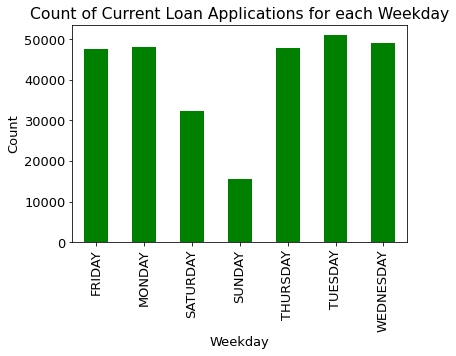

In [168]:
#Creating a dataframe grouping by the column 'CURR_WEEKDAY_APPR_PROCESS_START'
days_group = clean_loan_data.groupby('CURR_WEEKDAY_APPR_PROCESS_START')

#Record count number of data points for each day
days_group_count = pd.DataFrame(days_group['CURR_WEEKDAY_APPR_PROCESS_START'].count())

#Bar chart based off of the group series
loan_weekdays_chart = days_group_count.plot(kind='bar', title="Count of Current Loan Applications for each Weekday", color="green", legend=None)

#xlabel and ylabels
loan_weekdays_chart.set_xlabel("Weekday")
loan_weekdays_chart.set_ylabel("Count")

# Save the figure
#plt.savefig("AppsbyWeekdayBarChart.png")

plt.show()

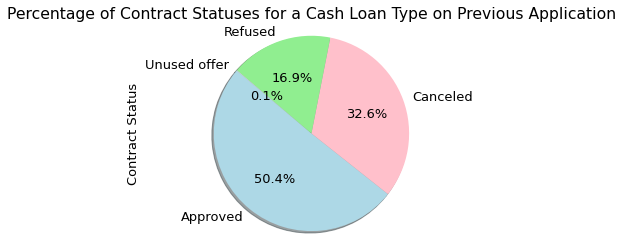

In [127]:
#Dataframe for cash loan'PREV_NAME_CONTRACT_TYPE'
cash_loan_type=clean_loan_data.loc[clean_loan_data['PREV_NAME_CONTRACT_TYPE'] == "Cash loans"]

#Dataframe grouping by the 'PREV_NAME_CONTRACT_STATUS' column
cashloan_status_group = cash_loan_type.groupby('PREV_NAME_CONTRACT_STATUS')

#dataframe counting the number of data points for each contract status type
cashloan_status_group_count = pd.DataFrame(cashloan_status_group['PREV_NAME_CONTRACT_STATUS'].count())

#Labels for pie chart
cashloan_statuses = list(cashloan_status_group_count.index.values)
cashloan_statuses_count = cashloan_status_group_count['PREV_NAME_CONTRACT_STATUS']

#The colors of each section of the pie chart
colors = ["lightblue", "pink", "lightgreen", "lavender"]

#Create the pie chart based on values
plt.pie(cashloan_statuses_count, labels=cashloan_statuses, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 13
plt.title("Percentage of Contract Statuses for a Cash Loan Type on Previous Application")
plt.ylabel("Contract Status")
plt.axis("equal")
#plt.savefig("CashloanStatusesPieChart.png")
plt.show()

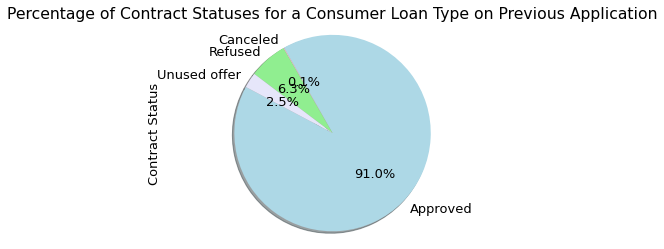

In [128]:
#Dataframe for consumer loan'PREV_NAME_CONTRACT_TYPE'
consumer_loan_type=clean_loan_data.loc[clean_loan_data['PREV_NAME_CONTRACT_TYPE'] == "Consumer loans"]

#Dataframe grouping by the 'PREV_NAME_CONTRACT_STATUS' column
consumerloan_status_group = consumer_loan_type.groupby('PREV_NAME_CONTRACT_STATUS')

#dataframe counting the number of data points for each contract status type
consumerloan_status_group_count = pd.DataFrame(consumerloan_status_group['PREV_NAME_CONTRACT_STATUS'].count())

#Labels for pie chart
consumerloan_statuses = list(consumerloan_status_group_count.index.values)
consumerloan_statuses_count = consumerloan_status_group_count['PREV_NAME_CONTRACT_STATUS']

#The colors of each section of the pie chart
colors = ["lightblue", "pink", "lightgreen", "lavender"]

#Create the pie chart based on values
plt.pie(consumerloan_statuses_count, labels=consumerloan_statuses, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=152)
plt.rcParams['font.size'] = 13
plt.title("Percentage of Contract Statuses for a Consumer Loan Type on Previous Application")
plt.ylabel("Contract Status")
plt.axis("equal")
#plt.savefig("ConsumerloanStatusesPieChart.png")
plt.show()

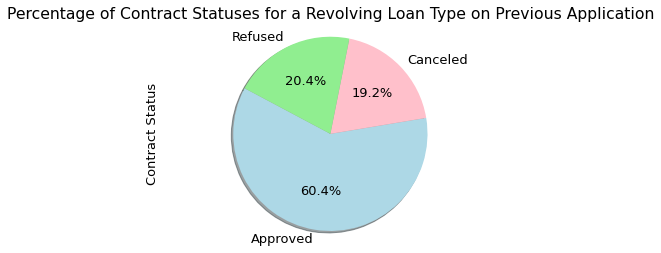

In [129]:
#Dataframe for revolving loan'PREV_NAME_CONTRACT_TYPE'
revolving_loan_type=clean_loan_data.loc[clean_loan_data['PREV_NAME_CONTRACT_TYPE'] == "Revolving loans"]

#Dataframe grouping by the 'PREV_NAME_CONTRACT_STATUS' column
revolvingloan_status_group = revolving_loan_type.groupby('PREV_NAME_CONTRACT_STATUS')

#dataframe counting the number of data points for each contract status type
revolvingloan_status_group_count = pd.DataFrame(revolvingloan_status_group['PREV_NAME_CONTRACT_STATUS'].count())

#Labels for pie chart
revolvingloan_statuses = list(revolvingloan_status_group_count.index.values)
revolvingloan_statuses_count = revolvingloan_status_group_count['PREV_NAME_CONTRACT_STATUS']

#The colors of each section of the pie chart
colors = ["lightblue", "pink", "lightgreen", "lavender"]

#Create the pie chart based on values
plt.pie(revolvingloan_statuses_count, labels=revolvingloan_statuses, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=152)
plt.rcParams['font.size'] = 13
plt.title("Percentage of Contract Statuses for a Revolving Loan Type on Previous Application")
plt.ylabel("Contract Status")
plt.axis("equal")
#plt.savefig("RevolvingloanStatusesPieChart.png")
plt.show()

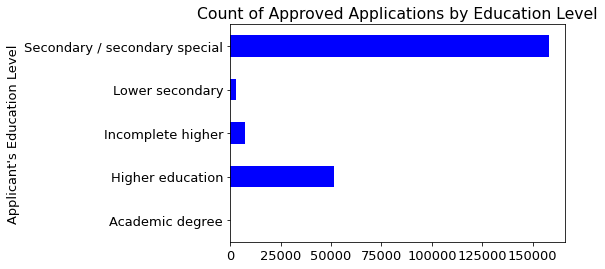

In [162]:
#Dataframe for approved loans using 'PREV_NAME_CONTRACT_STATUS' column
approved_loans=clean_loan_data.loc[clean_loan_data['PREV_NAME_CONTRACT_STATUS'] == "Approved"]

#Creating a dataframe grouping by the column 'CURR_NAME_EDUCATION_TYPE'
education_group = approved_loans.groupby('CURR_NAME_EDUCATION_TYPE')

#Record count number of data points for each education level
education_group_count = pd.DataFrame(education_group['CURR_NAME_EDUCATION_TYPE'].count())

#Create bar graph
approvedloan_education_chart = education_group_count.plot(kind='barh', title="Count of Approved Applications by Education Level", color="blue", legend=None)
# Set the ylabel using class methods
approvedloan_education_chart.set_ylabel("Applicant's Education Level")

# Save the figure
#plt.savefig("ApprovedbyEducationBarChart.png")
plt.show()

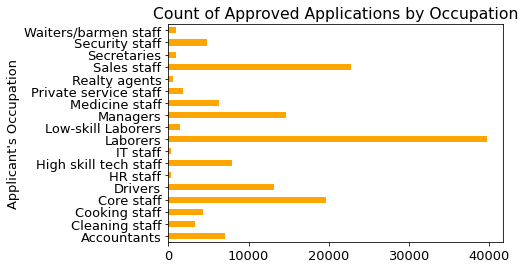

In [166]:
#Creating a dataframe grouping by the column 'CURR_OCCUPATION_TYPE'
occupation_group = approved_loans.groupby('CURR_OCCUPATION_TYPE')

#Record count number of data points for each occupation
occupation_group_count=pd.DataFrame(occupation_group['CURR_OCCUPATION_TYPE'].count())

#Create bar graph
approvedloan_occupation_chart = occupation_group_count.plot(kind='barh', title="Count of Approved Applications by Occupation", color="orange", legend=None)
# Set the ylabel using class methods
approvedloan_occupation_chart.set_ylabel("Applicant's Occupation")

#grouped = df.groupby('mygroups').sum().reset_index()
#grouped.sort_values('mygroups', ascending=False)

# Save the figure
#plt.savefig("ApprovedbyOccupationBarChart.png")
plt.show()

Text(0.5, 1.0, 'Contract Status Distribution of Requested Credit Amount on Previous Application')

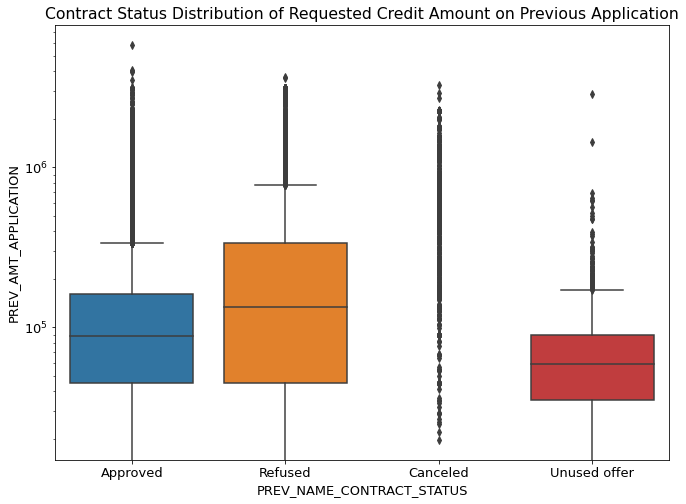

In [221]:
#Create boxplot for name
import seaborn as sns
plt.figure(figsize=(11,8))
creditamount_status_boxplot = sns.boxplot(x = 'PREV_NAME_CONTRACT_STATUS' , y = 'PREV_AMT_APPLICATION',data = clean_loan_data)
creditamount_status_boxplot.set_yscale('log')
creditamount_status_boxplot.set_title('Contract Status Distribution of Requested Credit Amount on Previous Application')